In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [14]:
df = pd.read_csv('NCAA_data.csv')
df.head()

,player_id,name,class,college,assists,blocks,effective_field_goal_percentage,field_goal_percentage,free_throw_attempt_rate,free_throw_percentage,...,turnover_percentage,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40
0,kenyon-martin-1,Kenyon Martin,Player,cincinnati,142,292,0.587,0.586,0.494,0.581,...,14.3,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821
1,aj-guyton-1,A.J. Guyton,Player,indiana,403,52,0.541,0.455,0.249,0.790,...,13.6,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847
2,jake-voskuhl-1,Jake Voskuhl,Player,uconn,124,193,0.542,0.542,0.555,0.656,...,23.0,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403
3,khalid-el-amin-1,Khalid El-Amin,Bust,uconn,479,10,0.486,0.416,0.257,0.822,...,15.6,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302
4,mike-smith-1,Mike Smith,Bust,university of louisiana at monroe,147,42,0.507,0.428,0.357,0.769,...,20.0,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200


In [15]:
y = df["class"]

In [17]:
X = df.drop(["player_id","name", "class","college"], axis=1)
X.head()

,assists,blocks,effective_field_goal_percentage,field_goal_percentage,free_throw_attempt_rate,free_throw_percentage,games_played,height,minutes_played,points,...,turnover_percentage,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40
0,142,292,0.587,0.586,0.494,0.581,116,81,2042.0,1279,...,14.3,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821
1,403,52,0.541,0.455,0.249,0.790,128,73,3260.0,2100,...,13.6,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847
2,124,193,0.542,0.542,0.555,0.656,138,83,2184.0,863,...,23.0,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403
3,479,10,0.486,0.416,0.257,0.822,108,70,2149.0,1650,...,15.6,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302
4,147,42,0.507,0.428,0.357,0.769,55,80,1938.0,1062,...,20.0,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200


In [18]:
X = df[['win_shares_per_40_minutes', 'field_goal_percentage', 'free_throw_attempt_rate', 'total_rebounds_per_40']]

In [19]:
#Split into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [21]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
train_scores = []
test_scores = []
for k in range (1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.561
k: 3, Train/Test Score: 0.815/0.612
k: 5, Train/Test Score: 0.792/0.636
k: 7, Train/Test Score: 0.770/0.631
k: 9, Train/Test Score: 0.759/0.654
k: 11, Train/Test Score: 0.765/0.654
k: 13, Train/Test Score: 0.754/0.650
k: 15, Train/Test Score: 0.753/0.650
k: 17, Train/Test Score: 0.751/0.654
k: 19, Train/Test Score: 0.746/0.659


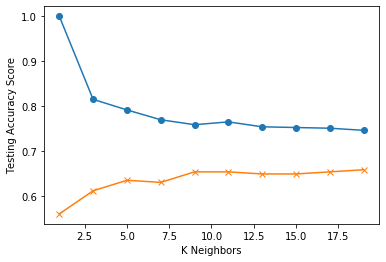

In [23]:
plt.plot(range(1, 20, 2), train_scores, marker = 'o')
plt.plot(range(1, 20, 2), test_scores, marker = "x")
plt.xlabel("K Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
model.fit(X_train, y_train)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\newca\.conda\envs\pythondata\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-d8ff73d9b4a1>", line 1, in <module>
    model.fit(X_train, y_train)
  File "C:\Users\newca\.conda\envs\pythondata\lib\site-packages\sklearn\linear_model\_base.py", line 492, in fit
    y_numeric=True, multi_output=True)
  File "C:\Users\newca\.conda\envs\pythondata\lib\site-packages\sklearn\utils\validation.py", line 763, in check_X_y
    y = y.astype(np.float64)
ValueError: could not convert string to float: 'Player'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\newca\.conda\envs\pythondata\lib\site-packages\IPython\core\interactiveshell.py", line 2034, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_

ValueError: could not convert string to float: 'Player'